In [4]:
import pandas as pd
import seaborn as sns

In [5]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [6]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data Cleaning

In [7]:
# column which has nul value
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
# Dataset converted into two set
# add new column name region
df.loc[:122,"Region"]=1
df.loc[122:,"Region"]=2
df["Region"]=df["Region"].astype(int) # astype used to convert float into int data type

In [9]:
df["Region"]

0      1
1      1
2      1
3      1
4      1
      ..
241    2
242    2
243    2
244    2
245    2
Name: Region, Length: 246, dtype: int64

In [9]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [10]:
df.shape

(246, 15)

In [10]:
df=df.dropna().reset_index(drop=True)

In [12]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [13]:
df.shape

(244, 15)

In [11]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [12]:
# remove 122th row
df=df.drop(122).reset_index(drop=True)

In [16]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2


In [17]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [18]:
# some column misplaced
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [13]:
# we can fixed the spaces in column name
df.columns=df.columns.str.strip()

In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [15]:
# changing the required column in integer data type
df[["day","month","year","Temperature","RH","Ws"]]=df[["day","month","year","Temperature","RH","Ws"]].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [16]:
# changing other column to float data type
df[["Rain", "FFMC",
       "DMC", "DC", "ISI", "BUI", "FWI"]]=df[["Rain", "FFMC",
       "DMC", "DC", "ISI", "BUI", "FWI",]].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


### Data cleaning in target variable

In [32]:
# check unique value of target variable
df.Classes

0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: object

In [35]:
df.Classes.value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [17]:
# look like value are misplaces so we will use str.strip()
df.Classes=df.Classes.str.strip()

In [18]:
df.Classes.value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

### Region 1(Bejaia region)

In [38]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


### Region 2 (sidi-bel abbes region)

In [39]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


In [19]:
# export the cleaned data
df.to_csv("Algerian_forest_fires_dataset_Cleaned.csv")

## Exploratory Data Analysis(EDA)

In [41]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
# dropping year features
df1=df.drop(['day', 'month', 'year'],axis=1)

In [59]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [21]:
# encoding not fire as 0 and fire as 1
import numpy as np
df1["Classes"]=np.where(df1["Classes"]=="not fire",0,1)

In [22]:
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,2
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,2
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,2


In [23]:
df1.Classes.value_counts()

1    137
0    106
Name: Classes, dtype: int64

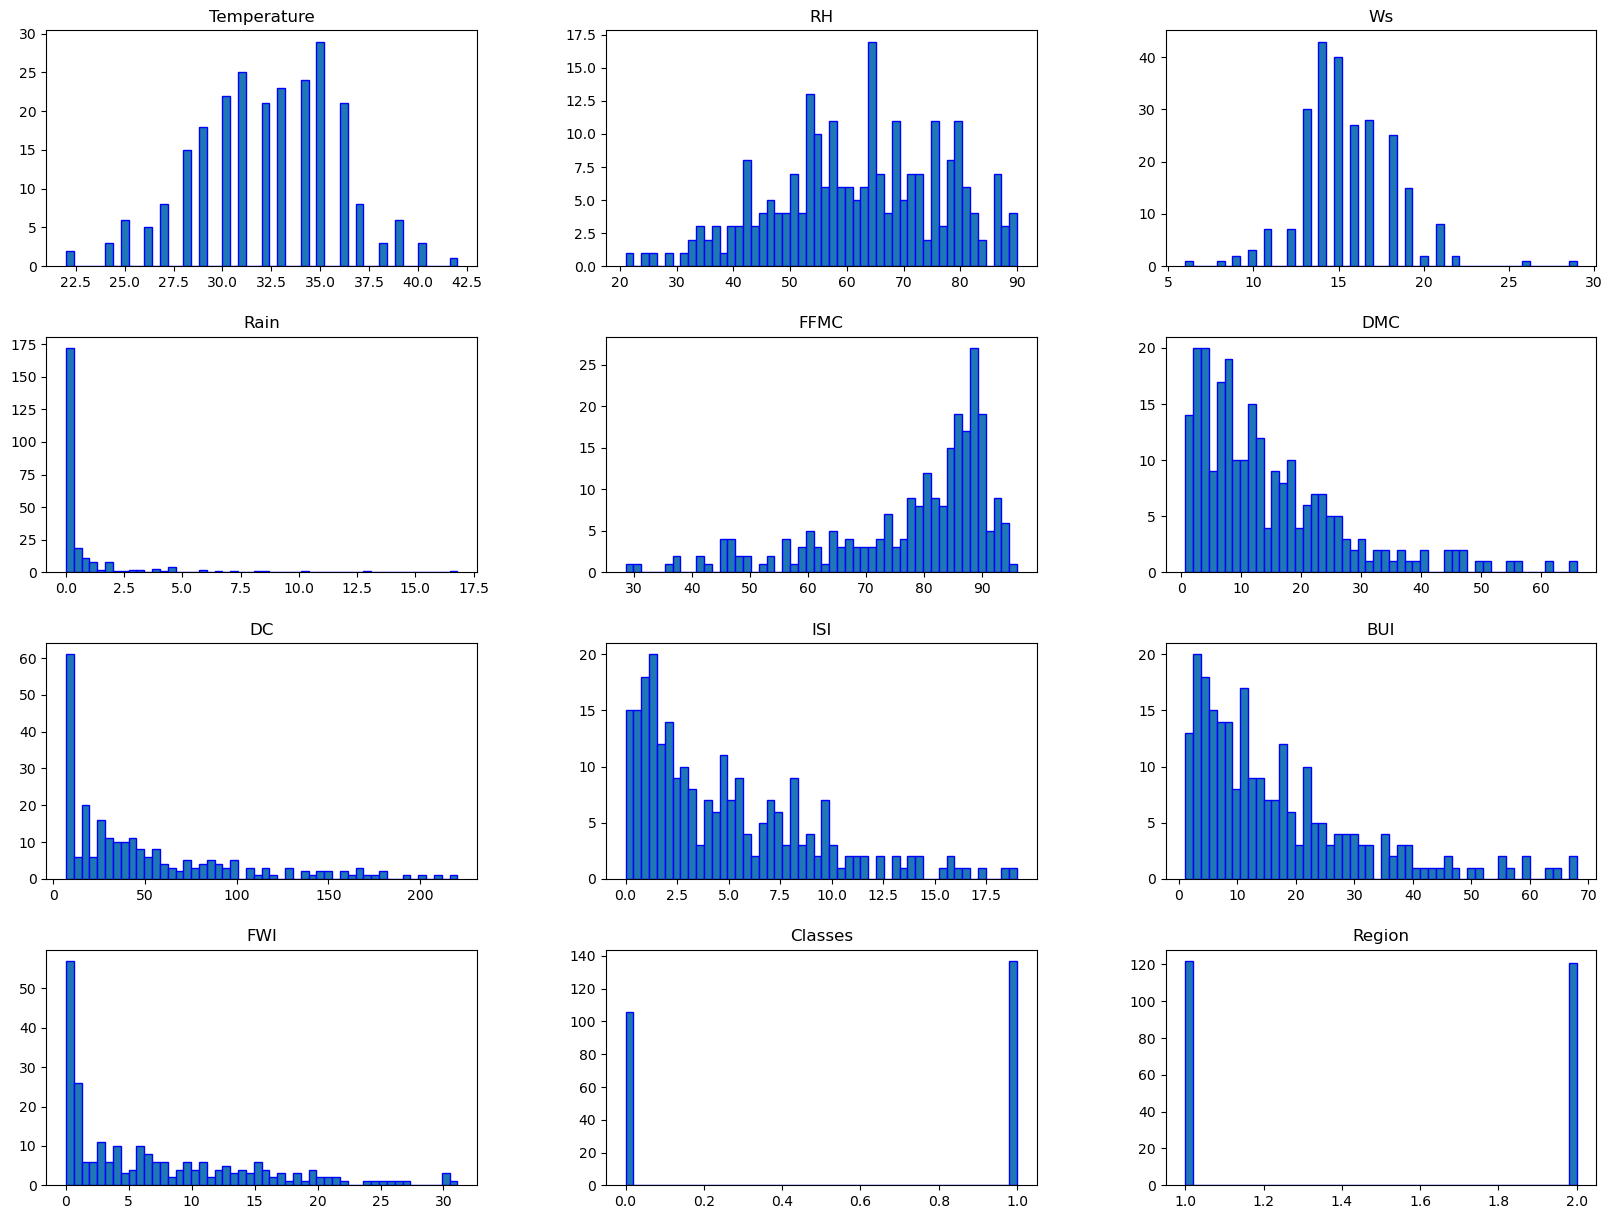

In [24]:
import matplotlib.pyplot as plt

df1.hist(bins=50,figsize=(20,15),ec="b",grid=False)
plt.show()

/tmp/ipykernel_84/1862175139.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


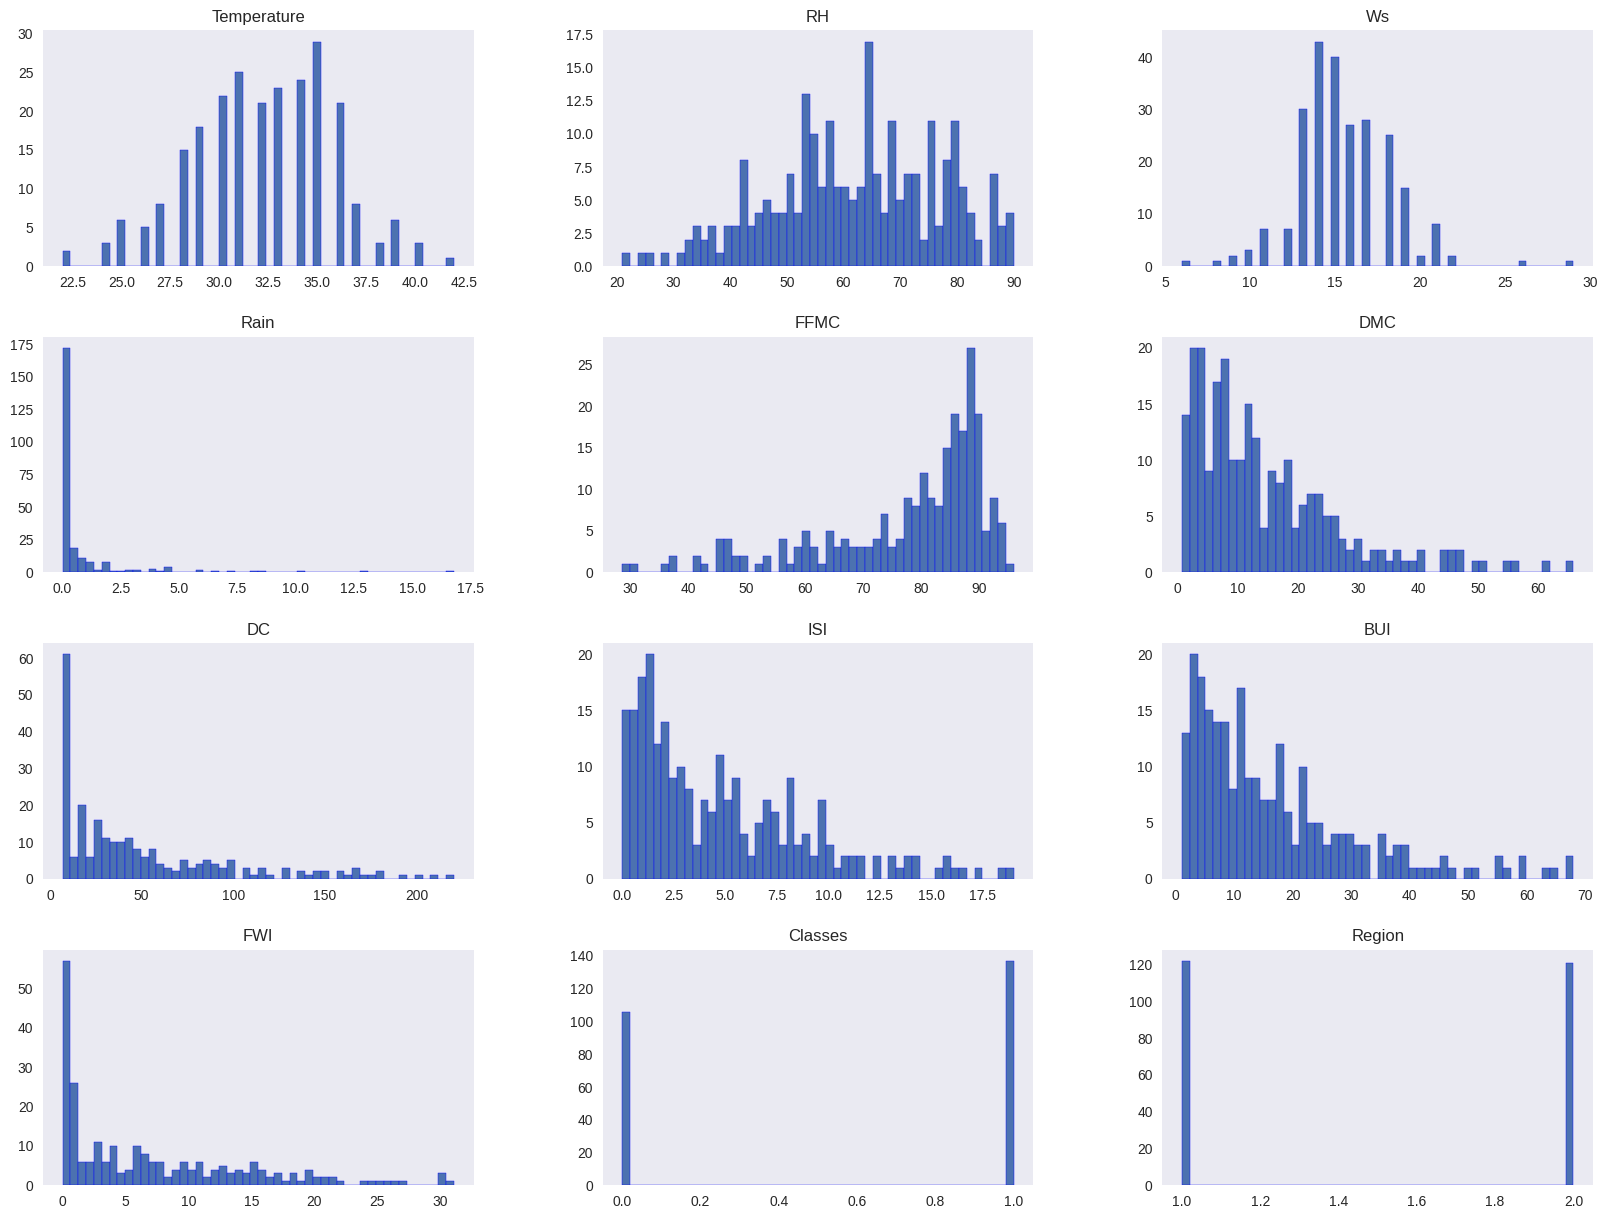

In [25]:
plt.style.use("seaborn")
df1.hist(bins=50,figsize=(20,15),ec="b",grid=False)
plt.show()

In [26]:
# percentage for pie chart
percentage=df1.Classes.value_counts(normalize=True)*100

In [27]:
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

#### chart

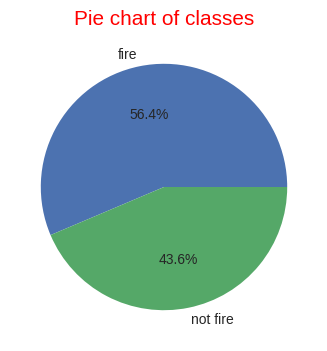

In [28]:
plt.figure(figsize=(8,4))
plt.pie(percentage,labels=["fire","not fire"],autopct="%1.1f%%")
plt.title("Pie chart of classes",fontsize=15,color="r")
plt.show()

#### Canadian Forest Fire Weather Index (FWI) System

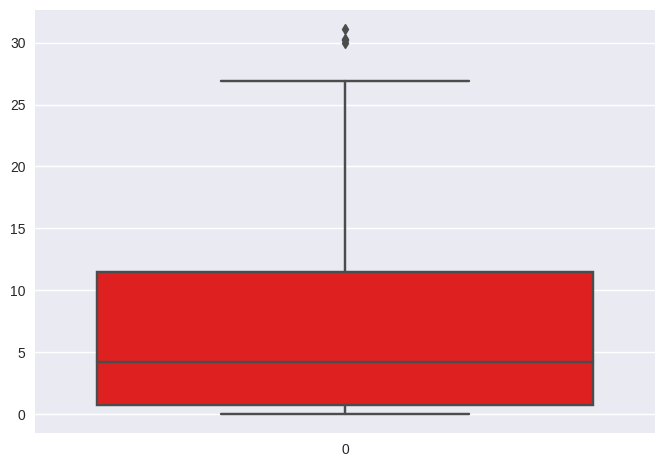

In [87]:
# boxplot
ax=sns.boxplot(data=df["FWI"],color="red")

## Monthwise Fire Analysis

In [92]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

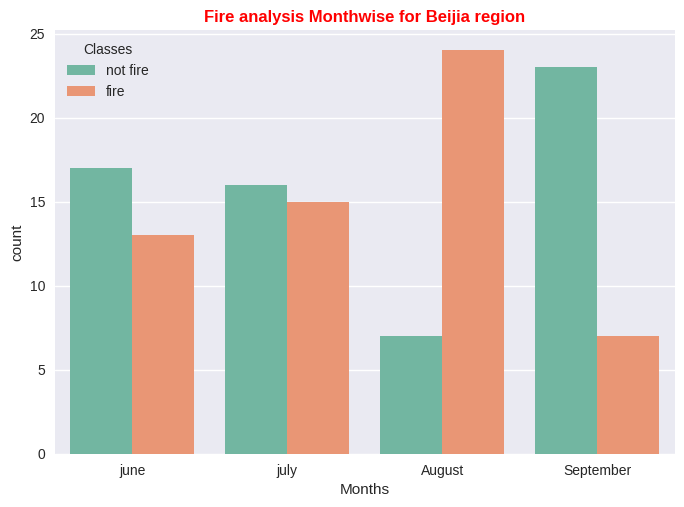

In [35]:
# for Beijia region
import seaborn as sns
df_temp=df.loc[df["Region"]==1]
sns.countplot(data=df_temp,x="month",hue="Classes",palette="Set2") # palette is here for color combination.
plt.xlabel("Months")
plt.xticks(np.arange(4),["june","july","August","September"])
plt.title("Fire analysis Monthwise for Beijia region",weight="bold",color="r")
plt.show()

It is observed that most of the fire happen in August month and very less fire in september month.


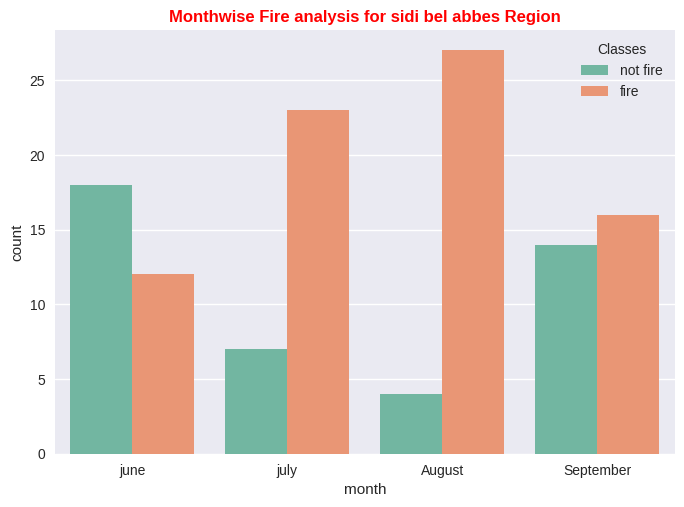

In [56]:
# for sidi bel abbes region
df_temp1=df.loc[df["Region"]==2]
sns.countplot(data=df_temp1,x="month",hue="Classes",palette= "Set2")
plt.title("Monthwise Fire analysis for sidi bel abbes Region", color="r",weight="bold")
plt.xticks(np.arange(4),["june","july","August","September"])
plt.show()

It is observed that most no. of forest fire happened in July and August month.

In August month maximum no. of fire happened and in june month less no. of fire happened.

## EDA of all features

In [57]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [59]:
df1.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [67]:
df1.groupby(["Temperature"],as_index=False)["Classes"].sum()

,Temperature,Classes
0,22,0
1,24,0
2,25,0
3,26,1
4,27,1
5,28,3
6,29,5
7,30,7
8,31,16
9,32,12


In [87]:
def barchart(feature,xlabel):
    plt.figure(figsize=(14,8))
    by_feature=df1.groupby([feature],as_index=False)["Classes"].sum()
    ax=sns.barplot(data=by_feature[[feature,"Classes"]],x=feature,y="Classes",estimator=sum)
    ax.set(xlabel=xlabel,ylabel="Fire count")

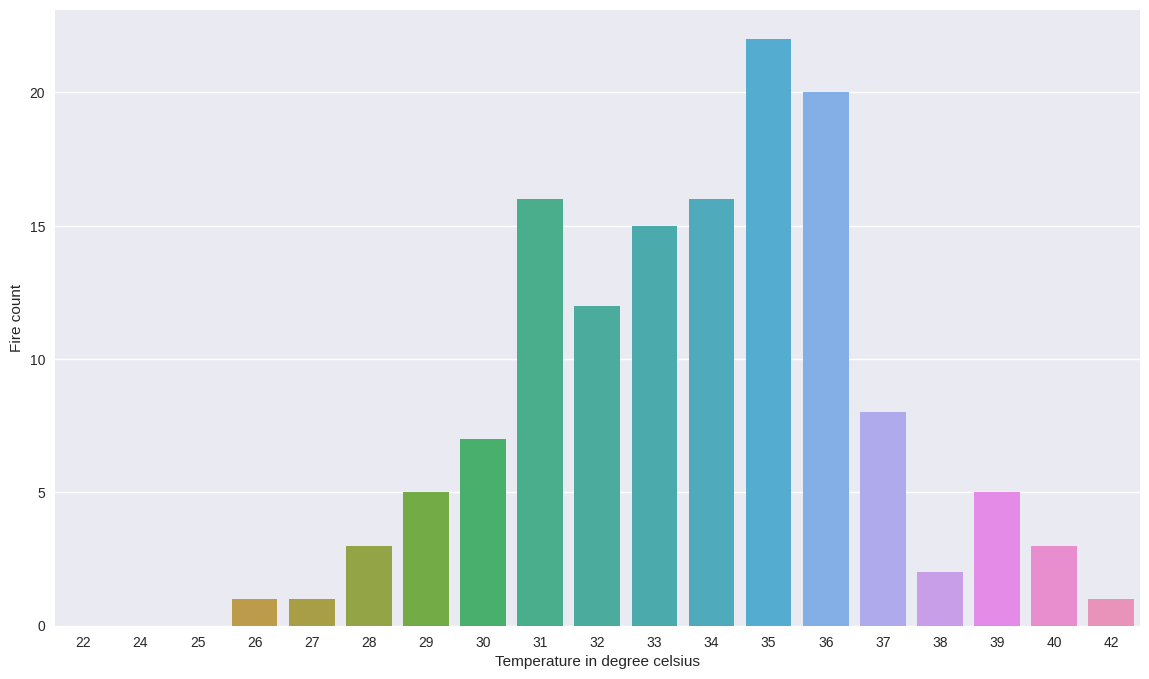

In [88]:
barchart("Temperature","Temperature in degree celsius")

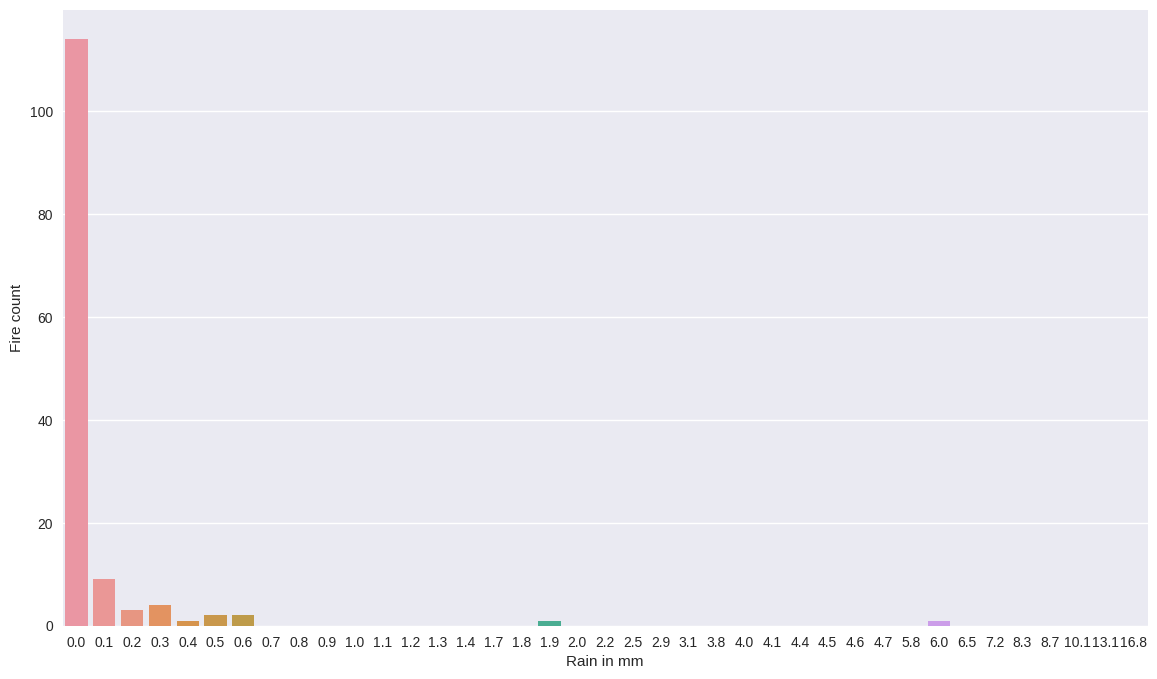

In [89]:
barchart("Rain","Rain in mm")

## Fine Fuel Moisture Code Index

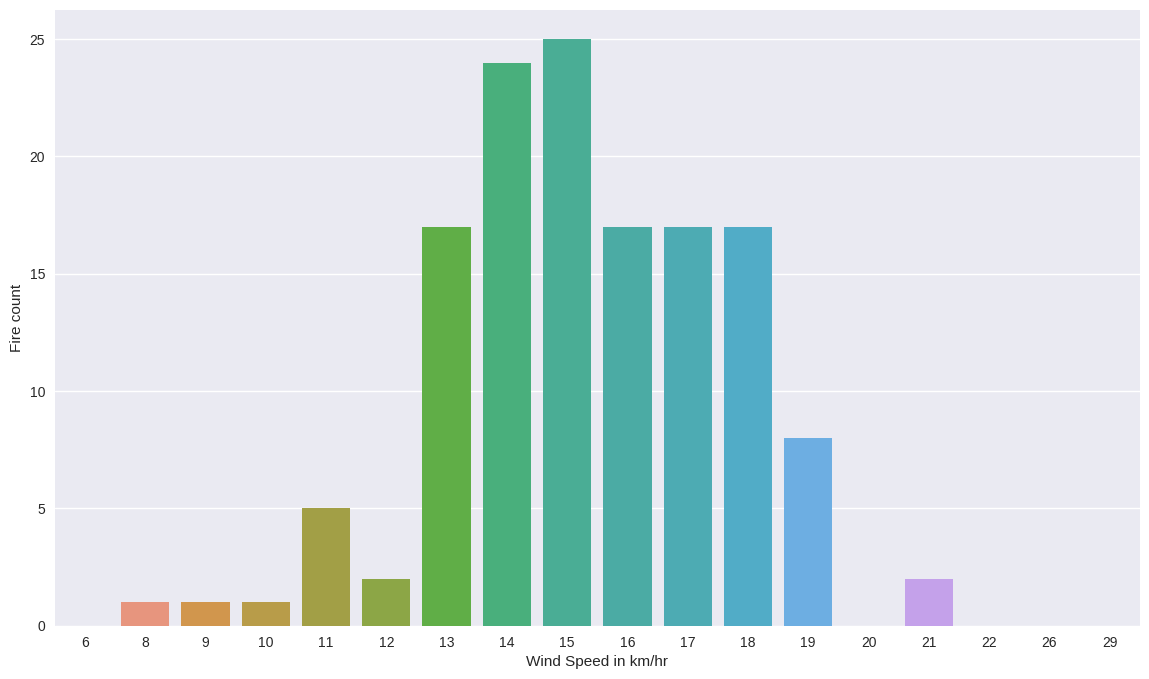

In [90]:
barchart('Ws', 'Wind Speed in km/hr')

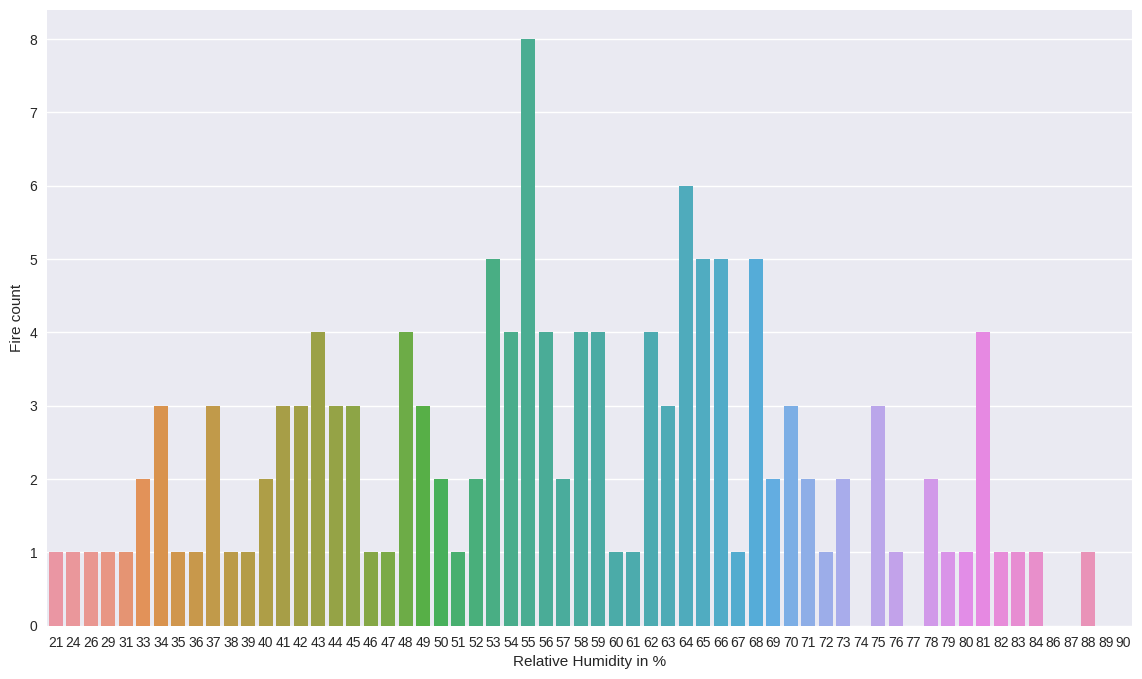

In [92]:
barchart('RH','Relative Humidity in %')

In [93]:
# boxplot of given dataset
df1_temp=df1.drop(["Classes","Region"],axis=1)

In [94]:
df1_temp

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


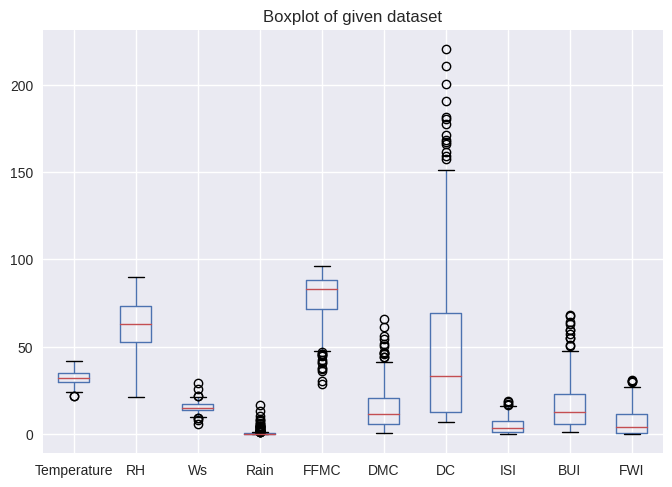

In [100]:
ax=df1_temp.boxplot()
ax.set_title("Boxplot of given dataset")
plt.show()

In [101]:
df1.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [102]:
df1_temp2=df1.drop(['Temperature', 'RH', 'Ws', 'Rain',"Region"],axis=1)

In [103]:
df1_temp2

,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,64.4,4.1,7.6,1.0,3.9,0.4,0
2,47.1,2.5,7.1,0.3,2.7,0.1,0
3,28.6,1.3,6.9,0.0,1.7,0.0,0
4,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...
238,85.4,16.0,44.5,4.5,16.9,6.5,1
239,41.1,6.5,8.0,0.1,6.2,0.0,0
240,45.9,3.5,7.9,0.4,3.4,0.2,0
241,79.7,4.3,15.2,1.7,5.1,0.7,0


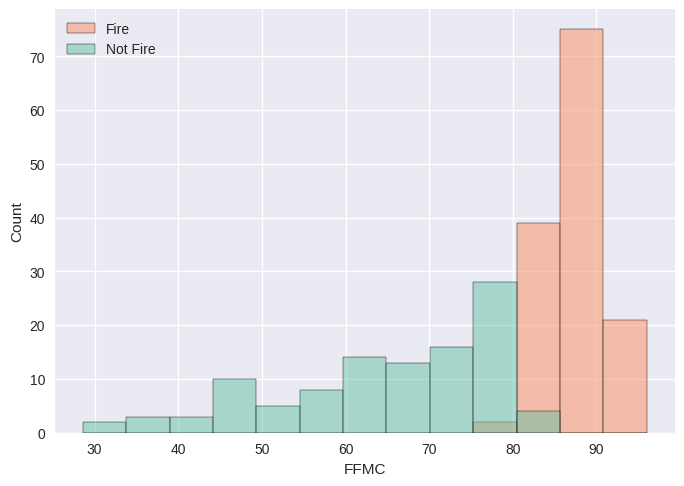

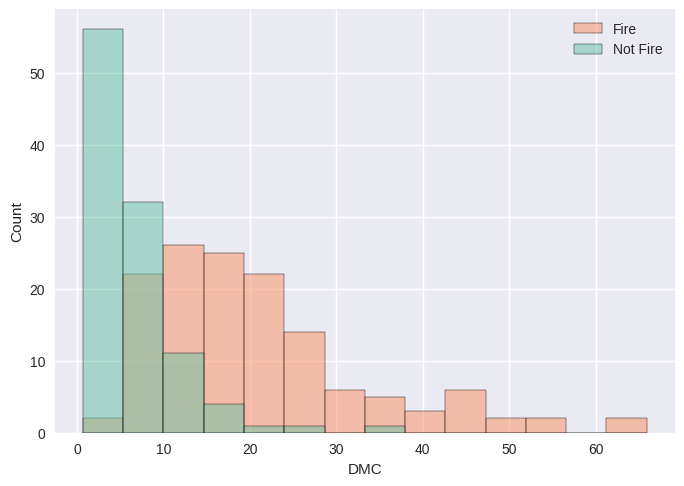

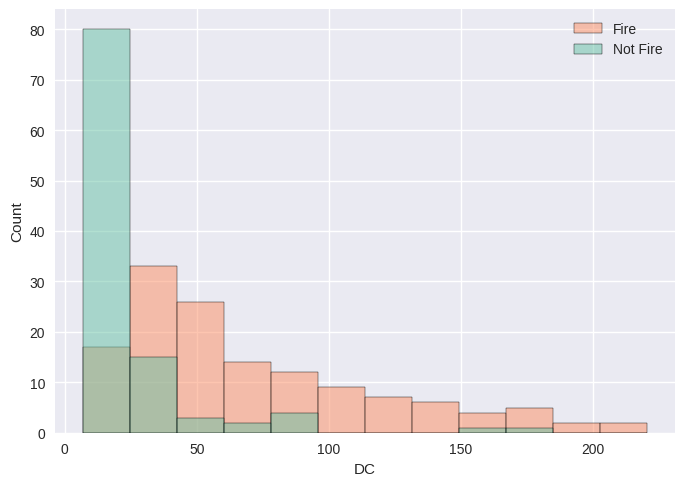

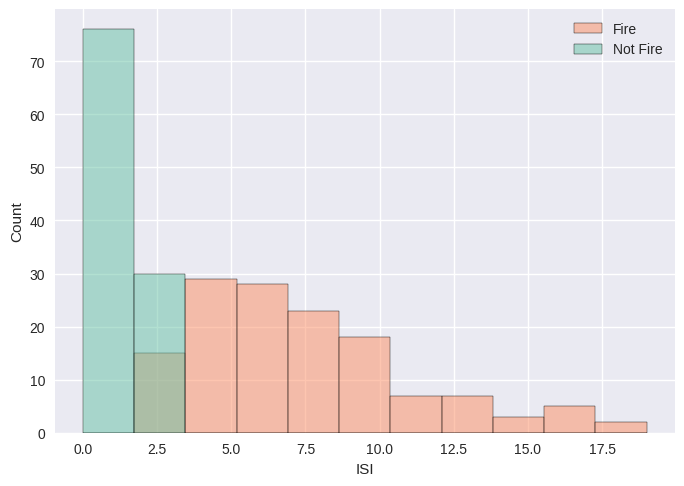

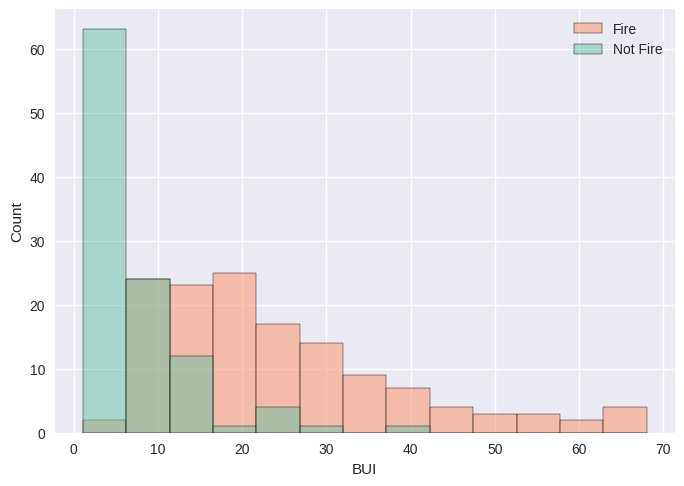

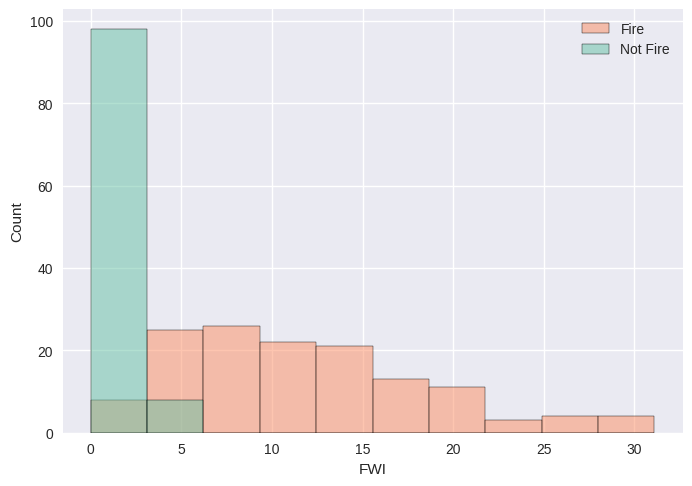

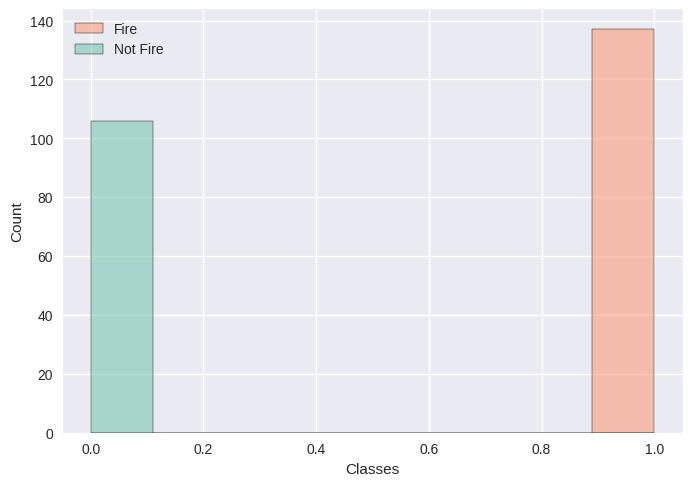

In [107]:
for feature in df1_temp2:
    sns.histplot(data=df1_temp2,x=feature,hue="Classes",palette="Set2")
    plt.legend(labels=['Fire','Not Fire'])
    plt.show()